In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from mplsoccer import Pitch

In [67]:
df = pd.read_csv("/Users/amitmishra/Desktop/goal 1 orlando vs minnesota.csv")

In [68]:
df.head()

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Away,A1,Position,0,27,23,56,-,-
1,Away,A2,Position,0,27,21,41,-,-
2,Away,A3,Position,0,27,19,23,-,-
3,Away,A4,Position,0,27,28,39,-,-
4,Away,A5,Position,0,27,23,28,-,-


In [69]:
df["X"] = df["X"]*1.2
df["Y"]= df["Y"]*0.8

In [81]:
# Filtering data for the 'Away' team (e.g., Minnesota)
minnesota = df[df["Team"]=='Away']
# Create a list of zeros for the team indicator column
minnesota1 = [0] * len(minnesota)

In [82]:
minnesota 

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Away,A1,Position,0,27,27.6,44.8,-,-
1,Away,A2,Position,0,27,25.2,32.8,-,-
2,Away,A3,Position,0,27,22.8,18.4,-,-
3,Away,A4,Position,0,27,33.6,31.2,-,-
4,Away,A5,Position,0,27,27.6,22.4,-,-
5,Away,A6,Position,0,27,37.2,31.2,-,-
10,Away,A7,Position,0,27,44.4,28.0,-,-
12,Away,A8,Position,0,27,49.2,55.2,-,-


In [83]:
# Filtering data for the 'Home' team (e.g., Orlando)
orlando = df[df["Team"]=='Home']
# Create a list of ones for the team indicator column
orlando1 = [1] * len(orlando)

In [85]:
# Concatenate X and Y coordinates of both teams
combined_x = pd.concat([minnesota['X'], orlando['X']], ignore_index=True)
combined_y = pd.concat([minnesota['Y'], orlando['Y']], ignore_index=True)

In [88]:
# Concatenate team indicator column
team_indicator = pd.concat([pd.Series(minnesota1), pd.Series(orlando1)], ignore_index=True)

# Create a new dataframe
mydf = pd.DataFrame({
    'x': combined_x,
    'y': combined_y,
    'team': team_indicator
})

print(mydf)


       x     y  team
0   27.6  44.8     0
1   25.2  32.8     0
2   22.8  18.4     0
3   33.6  31.2     0
4   27.6  22.4     0
5   37.2  31.2     0
6   44.4  28.0     0
7   49.2  55.2     0
8   19.2  24.8     1
9   31.2  40.0     1
10  30.0  26.4     1
11  34.8  21.6     1
12  62.4  52.0     1
13  48.0  21.6     1
14  49.2  28.8     1


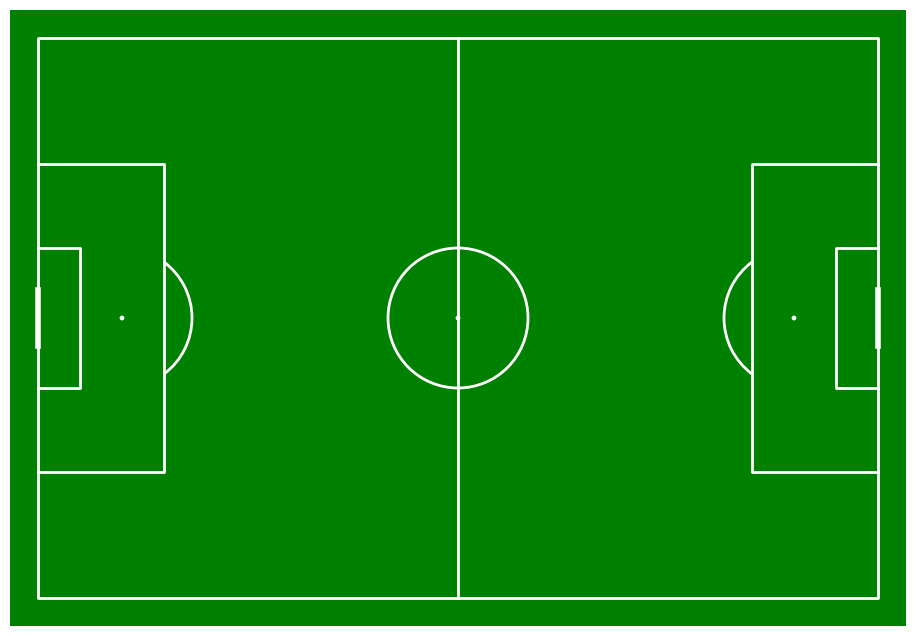

In [99]:
fig, ax = plt.subplots(figsize = (13,8))

pitch = Pitch(pitch_type = 'statsbomb', pitch_color = 'green', line_color = 'white')
pitch.draw(ax=ax)

In [92]:
#Create a points array to combine the x and the y values together from the dataframe column

points = np.column_stack((mydf.x, mydf.y))
points

array([[27.6, 44.8],
       [25.2, 32.8],
       [22.8, 18.4],
       [33.6, 31.2],
       [27.6, 22.4],
       [37.2, 31.2],
       [44.4, 28. ],
       [49.2, 55.2],
       [19.2, 24.8],
       [31.2, 40. ],
       [30. , 26.4],
       [34.8, 21.6],
       [62.4, 52. ],
       [48. , 21.6],
       [49.2, 28.8]])

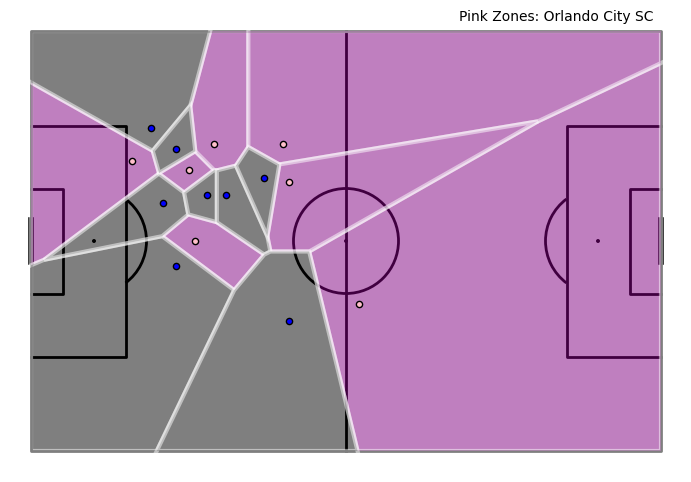

In [135]:
fig, ax = plt.subplots(figsize = (10,6))

pitch = Pitch(pitch_type = 'statsbomb', pitch_color = 'white', line_color = 'black')
pitch.draw(ax=ax)

x = mydf['x']
y = mydf['y']
team1, team2 = pitch.voronoi(x,y,mydf.team)

t1 = pitch.polygon(team1, ax = ax, fc = 'purple', ec = 'white', lw = 3, alpha = 0.5)
t2 = pitch.polygon(team2, ax = ax, fc = 'black', ec = 'white', lw = 3, alpha = 0.5)

#Plot players

sc1 = pitch.scatter(minnesota.X, minnesota.Y, c='blue', s=20, ec='k', ax=ax)
sc2 = pitch.scatter(orlando.X, orlando.Y, c='pink', s=20, ec='k', ax=ax)

annotation = ax.annotate('Pink Zones: Orlando City SC', (100, -2), fontsize=10, ha='center')

